dataset = https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction

# Load Dataset

In [2]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/CODEWAY/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Analysis-EDA

In [3]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.shape

(10000, 14)

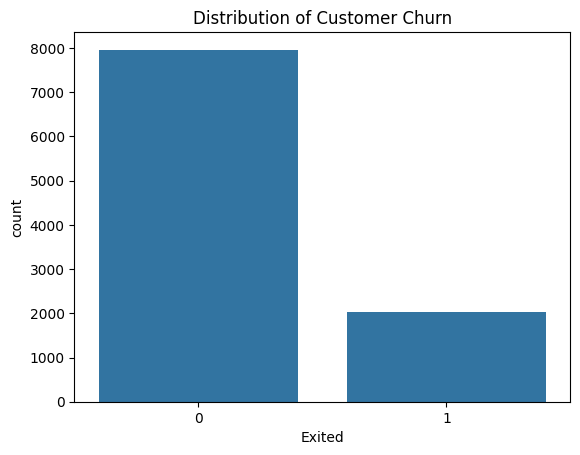

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable 'Exited'
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Customer Churn')
plt.show()

<ipython-input-10-fb96feedf42d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


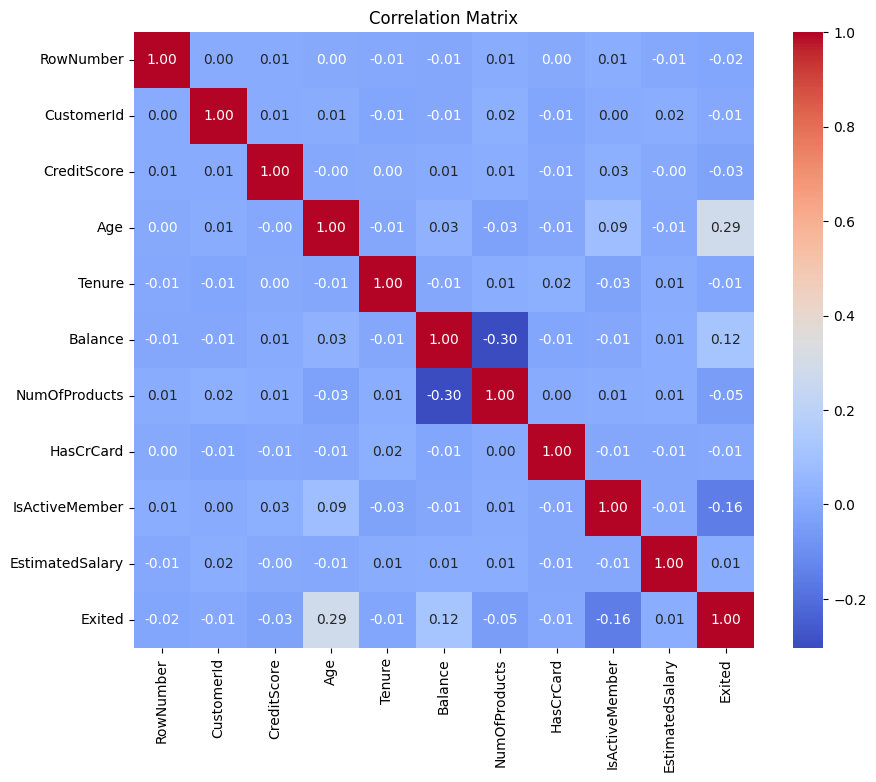

In [10]:
# Visualize the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

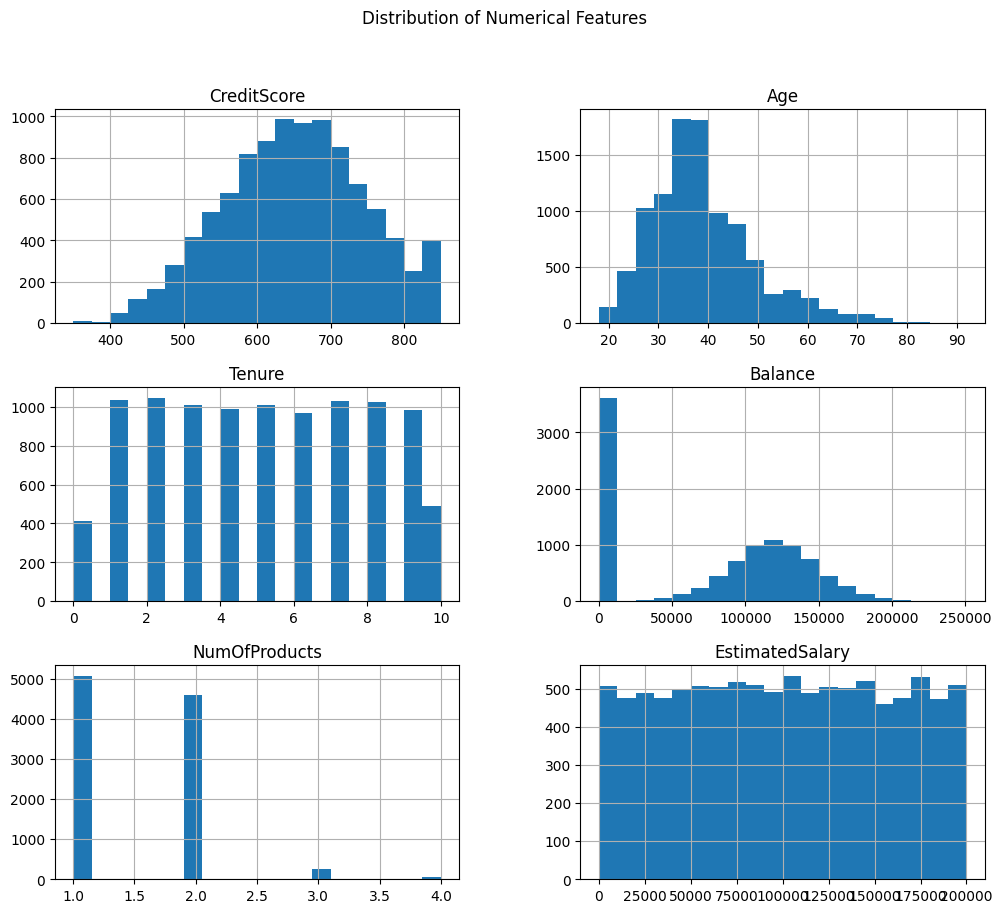

In [11]:
# Visualize the distribution of numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'CreditScore', ]
df[numerical_features].hist(bins=20, figsize=(12, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

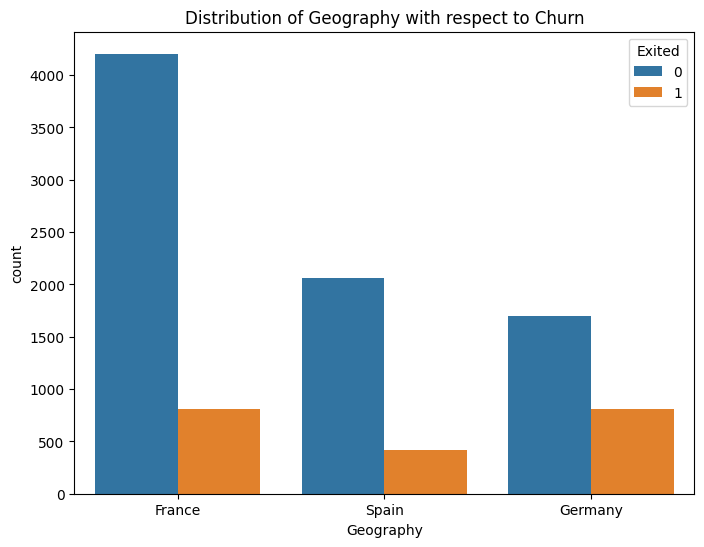

In [13]:
# Visualize the distribution of categorical features
categorical_features = ['Geography']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='Exited', data=df)
    plt.title(f'Distribution of {feature} with respect to Churn')
    plt.show()

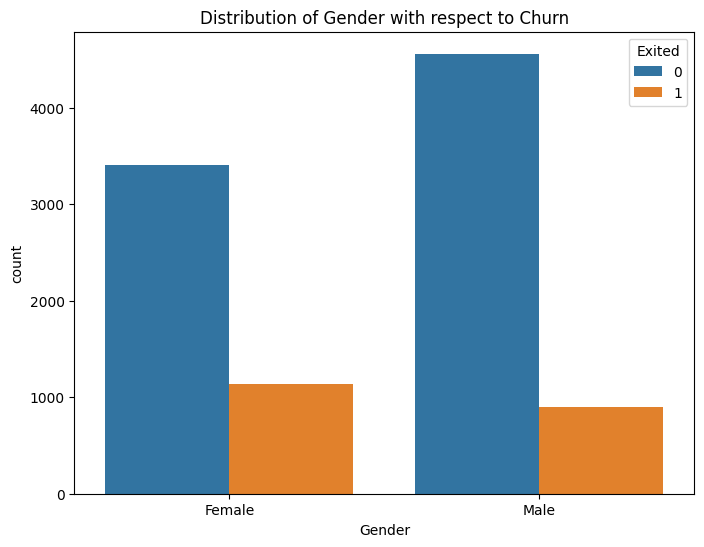

In [15]:
# Visualize the distribution of categorical features
categorical_features = ['Gender']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='Exited', data=df)
    plt.title(f'Distribution of {feature} with respect to Churn')
    plt.show()

<ipython-input-18-a6b631390b1f>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


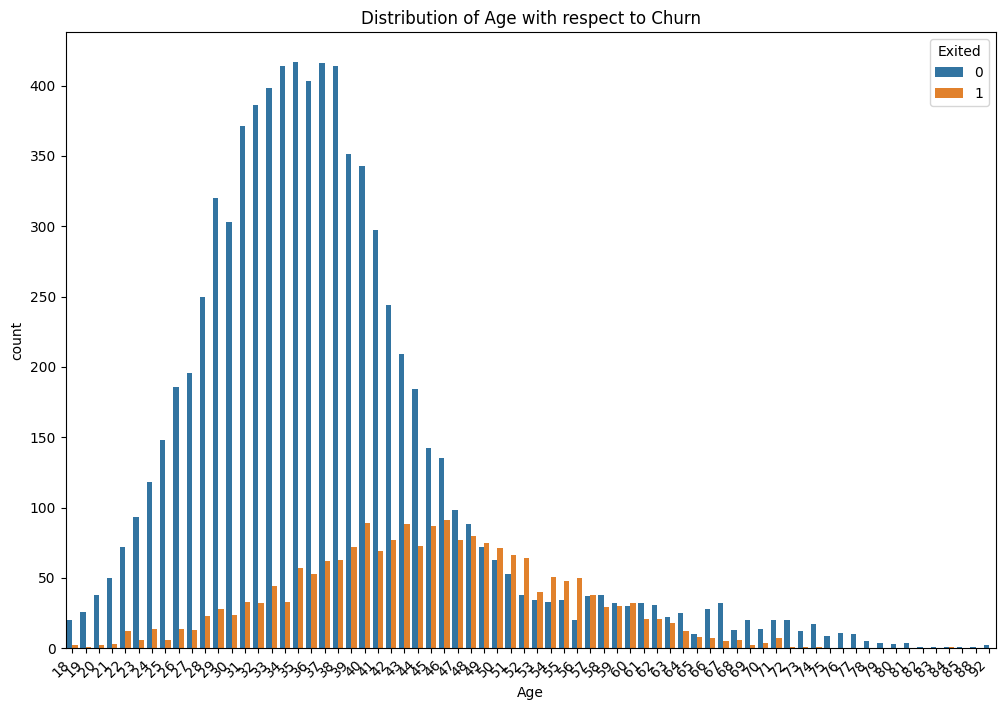

In [18]:
# Visualize the distribution of categorical features with rotated x-axis labels
categorical_features = ['Age']
for feature in categorical_features:
    plt.figure(figsize=(12, 8))
    ax = sns.countplot(x=feature, hue='Exited', data=df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.title(f'Distribution of {feature} with respect to Churn')
    plt.show()

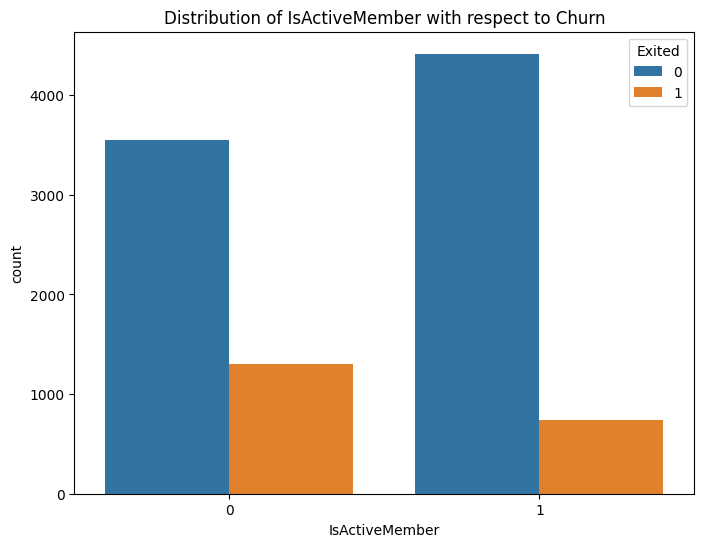

In [20]:
# Visualize the distribution of categorical features
categorical_features = ['IsActiveMember']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='Exited', data=df)
    plt.title(f'Distribution of {feature} with respect to Churn')
    plt.show()

# Important Libraries

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Select columns


In [63]:
# Select columns
selected_columns = ['IsActiveMember', 'NumOfProducts', 'Balance', 'Tenure', 'Age', 'CreditScore', 'EstimatedSalary']
X = df[selected_columns]
y = df['Exited']

# Split the data into training and testing sets


In [64]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Feature Scaling


In [65]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Logistic Regression


In [66]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)
logistic_preds = logistic_model.predict(X_test_scaled)

# Evaluation Logistic Regression

In [67]:

print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_preds))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_preds))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, logistic_preds))


Logistic Regression Accuracy: 0.812
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2416
           1       0.56      0.16      0.25       584

    accuracy                           0.81      3000
   macro avg       0.69      0.56      0.57      3000
weighted avg       0.77      0.81      0.77      3000

Logistic Regression Confusion Matrix:
[[2344   72]
 [ 492   92]]


# Logistic Regression Confusion Matrix


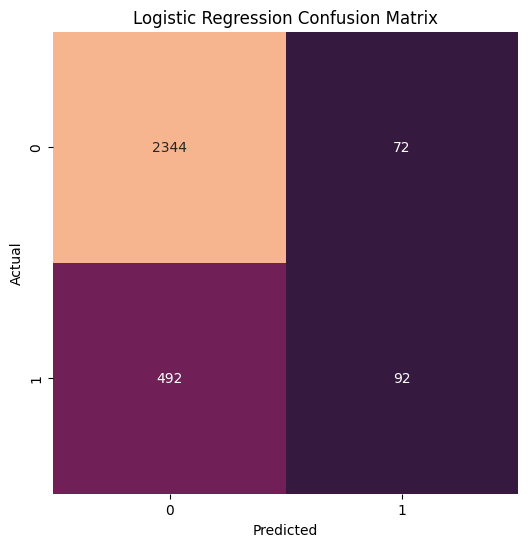

In [68]:
# Function to plot confusion matrix
def plot_confusion_matrix(model_name, cm):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap=sns.color_palette("rocket"), cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Logistic Regression Confusion Matrix
logistic_cm = confusion_matrix(y_test, logistic_preds)
plot_confusion_matrix('Logistic Regression', logistic_cm)


# Random Forest


In [69]:
# Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
rf_preds = random_forest_model.predict(X_test)


# Evaluation Random Forest


In [70]:
print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_preds))



Random Forest Accuracy: 0.8586666666666667
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      2416
           1       0.74      0.42      0.54       584

    accuracy                           0.86      3000
   macro avg       0.81      0.69      0.73      3000
weighted avg       0.85      0.86      0.84      3000

Random Forest Confusion Matrix:
[[2330   86]
 [ 338  246]]


# Random Forest Confusion Matrix


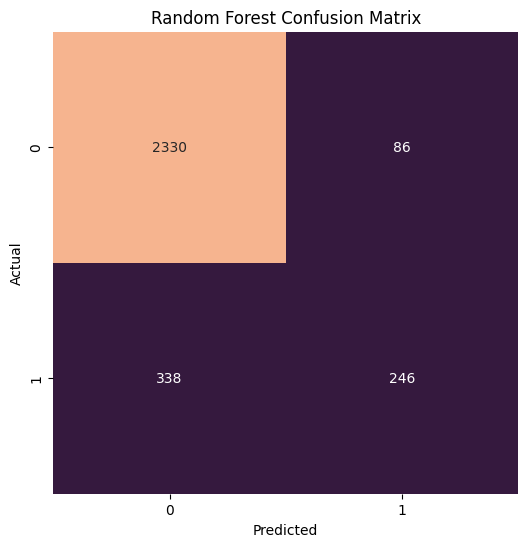

In [71]:
# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_preds)
plot_confusion_matrix('Random Forest', rf_cm)


# Gradient Boosting


In [72]:
# Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)
gb_preds = gradient_boosting_model.predict(X_test)


# Evaluation of Gradient Boosting


In [73]:
print("\nGradient Boosting Accuracy:", accuracy_score(y_test, gb_preds))
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_preds))
print("Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, gb_preds))


Gradient Boosting Accuracy: 0.867
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.79      0.43      0.56       584

    accuracy                           0.87      3000
   macro avg       0.83      0.70      0.74      3000
weighted avg       0.86      0.87      0.85      3000

Gradient Boosting Confusion Matrix:
[[2348   68]
 [ 331  253]]


# Gradient Boosting Confusion Matrix


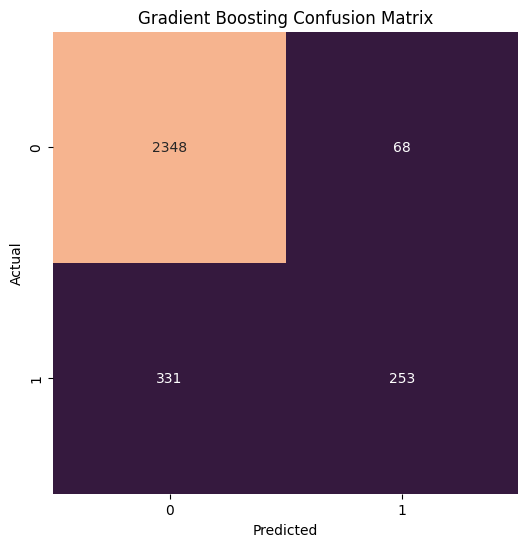

In [74]:

# Gradient Boosting Confusion Matrix
gb_cm = confusion_matrix(y_test, gb_preds)
plot_confusion_matrix('Gradient Boosting', gb_cm)

### Model Performance Observation:

#### Gradient Boosting:
- **Accuracy:** The Gradient Boosting model achieved an accuracy of 86.7%, indicating a reasonable overall predictive performance.
- **Precision-Recall Trade-off:** The model shows a trade-off between precision and recall, with higher precision for class 0 (no churn) and lower recall for class 1 (churn). This suggests the model is better at identifying non-churn cases but may miss some actual churn cases.
- **Confusion Matrix:** There are 68 false positives (predicted as churn but not actual churn) and 331 false negatives (actual churn but predicted as non-churn).

#### Random Forest:
- **Accuracy:** The Random Forest model achieved an accuracy of 85.9%, slightly lower than Gradient Boosting.
- **Similar Precision-Recall Trade-off:** Similar to Gradient Boosting, the Random Forest model exhibits a trade-off between precision and recall.
- **Confusion Matrix:** It has 86 false positives and 338 false negatives.

#### Logistic Regression:
- **Accuracy:** The Logistic Regression model achieved an accuracy of 81.2%, the lowest among the three models.
- **Precision-Recall Trade-off:** The model has higher precision for class 0 but lower recall for class 1.
- **Confusion Matrix:** It shows 72 false positives and 492 false negatives.

### Overall Summary:
- All three models demonstrate challenges in predicting churn, with a notable trade-off between precision and recall.
- The Gradient Boosting model outperforms the others in terms of accuracy, precision, and recall.
- Consider further model tuning, feature engineering, or exploring different algorithms to improve predictive performance.
- Assess business implications and decide on the balance between false positives and false negatives based on the specific context and cost considerations.